## 딥러닝 
### 심층신경망


In [1]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_input, train_target) , (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 mldl01 주피터노트북에서 다운로드 했기에 다시 다운로드 하지 않음
- 데이터 위치 C:\Users\Admin\.keras\datasets

In [3]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)


In [5]:
# 스케이링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))


In [6]:
# 훈련세트, 검증세트 분리

train_scaled, val_scaled, train_target,  val_target = train_test_split(
    train_scaled , train_target, random_state=42, test_size=0.2

)

In [7]:
print(train_scaled.shape,val_scaled.shape, test_scaled.shape)
print(train_target.shape,val_target.shape, test_target.shape)


(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


#### 심층신경망 만들기

In [8]:
dense = keras.layers.Dense(100, activation='sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

- dense
    - 입력층 다음의 첫 번째 은닉층(hidden layer)을 정의하는 코드
    - 100: 이 층의 뉴런 개수입니다. 이 층에는 100개의 뉴런이 있습니다.
    - activation='sigmoid': 각 뉴런의 활성화 함수로 sigmoid를 사용합니다. 이는 입력값을 0과 1 사이의 값으로 변환합니다.
    - input_shape=(724,): 입력 데이터의 **형태(shape)**를 지정해줍니다. 즉, 입력으로 들어오는 데이터가 724차원이라는 뜻입니다.

- dense2
    - 출력층(output layer)**을 정의하는 코드
    - 10: 이 층의 뉴런 수는 10개입니다. 보통 **10개의 클래스(분류 대상)**가 있다는 뜻입니다. 예: 숫자 0~9 분류 등
    - activation='softmax': softmax는 다중 분류에서 자주 쓰이는 활성화 함수로, 출력값들을 확률처럼 보이게 만들어줍니다. (각 값이 0~1 사이, 전체 합은 1)
    - 이 층은 (100차원 입력) → (10차원 출력)으로 변환합니다.

In [9]:
# 신경망 모델 생성
model = keras.Sequential([dense, dense2])


In [10]:
#모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,) , name = 'hidden' ),
    keras.layers.Dense(10, activation='softmax',  name = 'output' )
] , name = 'Fashio_MNIST_Model'
)

In [12]:
model.summary()

Model: "Fashio_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
#훈련
model.fit(train_scaled,  train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 844us/step - loss: 0.4688 - accuracy: 0.8365
Epoch 2/100
1500/1500 [==============================] - 1s 928us/step - loss: 0.3559 - accuracy: 0.8722
Epoch 3/100
1500/1500 [==============================] - 1s 902us/step - loss: 0.3192 - accuracy: 0.8845
Epoch 4/100
1500/1500 [==============================] - 1s 889us/step - loss: 0.2941 - accuracy: 0.8956
Epoch 5/100
1500/1500 [==============================] - 1s 848us/step - loss: 0.2748 - accuracy: 0.9006
Epoch 6/100
1500/1500 [==============================] - 1s 866us/step - loss: 0.2583 - accuracy: 0.9069
Epoch 7/100
1500/1500 [==============================] - 1s 842us/step - loss: 0.2436 - accuracy: 0.9119
Epoch 8/100
1500/1500 [==============================] - 1s 878us/step - loss: 0.2302 - accuracy: 0.9171
Epoch 9/100
1500/1500 [==============================] - 1s 861us/step - loss: 0.2192 - accuracy: 0.9217
Epoch 10/100
1500/1500 [=============================

KeyboardInterrupt: 

In [96]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 726us/step - loss: 0.8698 - accuracy: 0.8740


[0.8698276281356812, 0.8740000128746033]

In [97]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 665us/step


#### 시각화

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [100]:
class_names = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵클부츠']

In [101]:
# 테스트이미지와 예측결과 시각화

#pred_result[index]: 모델이 예측한 확률 벡터입니다 (예: [0.01, 0.03, ..., 0.9]).
#np.argmax(...): 확률이 가장 높은 인덱스를 구합니다 → 예측된 클래스.


def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]
    plt.text(0,-6,f'실제 : {true_label}', fontsize= 12, color = 'red')
    plt.text(0,-3,f'예측 : {pred_label}', fontsize= 12, color = 'blue')
    plt.axis('off')
    plt.show()

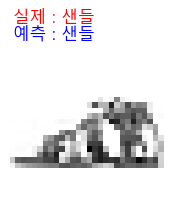

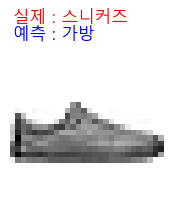

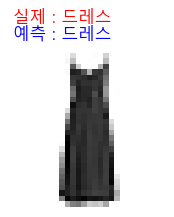

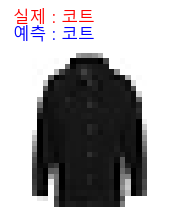

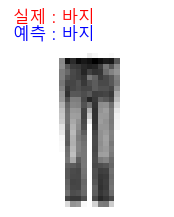

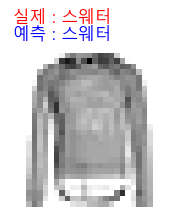

In [102]:
for i in range(11,17):
    show_image(i)

#### ReLu 함수
- 인공신경망 은닉층에 초기에는 Sigmoid함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워 있어서 올바른 출력을 못 만든다.

- 렐루함수(ReLu) : 수정된 선형 유닛 뜻의 함수
    - <img src = './렐루함수.png' width = "500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할 때, np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [103]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name= 'Flatten'),
    keras.layers.Dense(100, activation='relu',  name = 'hidden' ),
    keras.layers.Dense(10, activation='softmax',  name = 'output' ),
] , name = 'Fashio_MNIST_Model'
)

In [104]:
model2.summary()

Model: "Fashio_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
[train_input, train_target] , [test_input, test_target] = keras.datasets.fashion_mnist.load_data()

In [21]:
# 스케일링
# 이미지 데이터는 보통 픽셀 값이 0~255 사이의 정수로 되어 있음.
#255.0으로 나누면 모든 값이 0~1 사이의 실수 값으로 바뀜.

train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [22]:
train_scaled, val_scaled, train_target, val_target = train_test_split(

    train_scaled, train_target, random_state=42 , test_size=0.2
)

In [108]:
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [109]:
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 899us/step - loss: 0.5395 - accuracy: 0.8114
Epoch 2/20
1500/1500 [==============================] - 1s 920us/step - loss: 0.3951 - accuracy: 0.8574
Epoch 3/20
1500/1500 [==============================] - 1s 923us/step - loss: 0.3574 - accuracy: 0.8704
Epoch 4/20
1500/1500 [==============================] - 1s 890us/step - loss: 0.3350 - accuracy: 0.8799
Epoch 5/20
1500/1500 [==============================] - 1s 904us/step - loss: 0.3187 - accuracy: 0.8854
Epoch 6/20
1500/1500 [==============================] - 1s 885us/step - loss: 0.3059 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 1s 915us/step - loss: 0.2982 - accuracy: 0.8941
Epoch 8/20
1500/1500 [==============================] - 1s 956us/step - loss: 0.2873 - accuracy: 0.8981
Epoch 9/20
1500/1500 [==============================] - 1s 942us/step - loss: 0.2800 - accuracy: 0.9005
Epoch 10/20
1500/1500 [==============================] - 1s 951u

In [110]:
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 694us/step - loss: 0.4392 - accuracy: 0.8813


[0.4392000436782837, 0.8812500238418579]

- 시그모이드 활성화함수 사용했을 때  [0.8626047968864441, 0.8789166808128357]
- 렐루 활성화함수 사용했을 때   [0.42934268712997437, 0.8820000290870667]
- 렐루 함수가 정확도 0.01% 개선

#### 옵티마이저
- 하이퍼 파라미터 값 최적화

In [111]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name= 'Flatten'),
    keras.layers.Dense(100, activation='relu',  name = 'hidden' ),
    keras.layers.Dense(10, activation='softmax',  name = 'output' ),
] , name = 'Fashio_MNIST_Model'
)

In [112]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [113]:
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 922us/step - loss: 0.5250 - accuracy: 0.8184
Epoch 2/20
1500/1500 [==============================] - 1s 958us/step - loss: 0.3968 - accuracy: 0.8583
Epoch 3/20
1500/1500 [==============================] - 1s 941us/step - loss: 0.3532 - accuracy: 0.8732
Epoch 4/20
1500/1500 [==============================] - 1s 896us/step - loss: 0.3289 - accuracy: 0.8804
Epoch 5/20
1500/1500 [==============================] - 1s 917us/step - loss: 0.3098 - accuracy: 0.8873
Epoch 6/20
1500/1500 [==============================] - 1s 930us/step - loss: 0.2910 - accuracy: 0.8929
Epoch 7/20
1500/1500 [==============================] - 1s 964us/step - loss: 0.2795 - accuracy: 0.8970
Epoch 8/20
1500/1500 [==============================] - 1s 968us/step - loss: 0.2676 - accuracy: 0.9005
Epoch 9/20
1500/1500 [==============================] - 1s 965us/step - loss: 0.2583 - accuracy: 0.9049
Epoch 10/20
1500/1500 [==============================] - 1s 996u

In [114]:
# 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
# 이전의 fit 정확도 0.9305를 이어서 실행함
# 즉 epochs =40을 실행한 것임
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 971us/step - loss: 0.1813 - accuracy: 0.9319
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1771 - accuracy: 0.9348
Epoch 3/20
1500/1500 [==============================] - 1s 999us/step - loss: 0.1728 - accuracy: 0.9357
Epoch 4/20
1500/1500 [==============================] - 1s 971us/step - loss: 0.1687 - accuracy: 0.9360
Epoch 5/20
1500/1500 [==============================] - 1s 996us/step - loss: 0.1645 - accuracy: 0.9385
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1610 - accuracy: 0.9396
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1564 - accuracy: 0.9418
Epoch 8/20
1500/1500 [==============================] - 1s 964us/step - loss: 0.1532 - accuracy: 0.9431
Epoch 9/20
1500/1500 [==============================] - 1s 936us/step - loss: 0.1499 - accuracy: 0.9447
Epoch 10/20
1500/1500 [==============================] - 1s 966us/step

- optimizer 사용시, 정확도 0.01% 증가

In [115]:
model3.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 693us/step - loss: 0.4290 - accuracy: 0.8892


[0.4289517402648926, 0.8891666531562805]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림

In [116]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name= 'Flatten'),
    keras.layers.Dense(100, activation='relu',  name = 'hidden' ),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax',  name = 'output' ),
] , name = 'Fashio_MNIST_ReLu'
)

In [117]:
model4.summary()

Model: "Fashio_MNIST_ReLu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# epochs 10을 두번 실행해서
# 결국 epochs 20을 실행한 결과
model4.fit(train_scaled,train_target,epochs=10)



Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8831
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.8879
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.8856
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2985 - accuracy: 0.8885
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.8905
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2880 - accuracy: 0.8925
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2839 - accuracy: 0.8936
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.8934
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2788 - accuracy: 0.8951
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.273

In [121]:
model4.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 709us/step - loss: 0.3204 - accuracy: 0.8873


[0.3204251229763031, 0.8872500061988831]

- 드롭아웃 넣은 모델 model4 실행 결과 [0.3204251229763031, 0.8872500061988831]
- 드롭아웃 없는 모델 model3 실행결과 [0.4289517402648926, 0.8891666531562805]
- 드롭아웃하면 정확도 떨어짐 > 훈련과 검증(테스트) 사이에 정확도 차이가 줄어듬
- 과대적합(훈련세트훈련에 너무 치중하여서 정확도가 너무 높은 것 )방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [123]:
# 모델 4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [124]:
# 모델 4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### 모델 사용
- 파라미터만 지정한 파일을 사용하려면, 먼저 모델을 생성해야

In [15]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

In [127]:
model5.load_weights('./model4-weight.h5')

In [129]:
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 646us/step


- 모델까지 전부 생성해주는 방법

In [130]:
model6 = keras.models.load_model('./model4-whole.h5')

In [131]:
model6.summary()

Model: "Fashio_MNIST_ReLu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
model6.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 726us/step - loss: 0.3204 - accuracy: 0.8873


[0.3204251229763031, 0.8872500061988831]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능

In [23]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name= 'Flatten'),
    keras.layers.Dense(100, activation='relu',  name = 'hidden' ),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax',  name = 'output' ),
] , name = 'Fashio_MNIST_ReLu'
)

In [24]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [25]:
# 에포크마다 모델 저장 기능
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True)    #최고 상태일 때 저장
# 조기종료
# 두번이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구
early_stop_cb = keras.callbacks.EarlyStopping(patience=2)       

In [26]:


model7.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5909 - accuracy: 0.7937 - val_loss: 0.4513 - val_accuracy: 0.8298
Epoch 2/20
 158/1500 [==>...........................] - ETA: 1s - loss: 0.4475 - accuracy: 0.8441

c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4393 - accuracy: 0.8405 - val_loss: 0.3883 - val_accuracy: 0.8592
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4033 - accuracy: 0.8531 - val_loss: 0.3636 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3831 - accuracy: 0.8609 - val_loss: 0.3558 - val_accuracy: 0.8717
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3677 - accuracy: 0.8660 - val_loss: 0.3431 - val_accuracy: 0.8736
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3536 - accuracy: 0.8691 - val_loss: 0.3341 - val_accuracy: 0.8786
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3426 - accuracy: 0.8730 - val_loss: 0.3373 - val_accuracy: 0.8769
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3351 - accuracy: 0.8778 - val_loss: 0.3374 - val_accuracy: 0.8751


In [27]:
early_stop_cb.stopped_epoch

7

- patience=2이고, 에포크 6에서 최고 성능이었다면,
- 에포크 7,8에서 개선이 없으면,
- 에포크 8이 끝난 직후, “이제 멈춰야겠다”라고 결정합니다.
- 그래서 8까지 출력은 되지만, stopped_epoch=7가 되는 거예요.



#### 결론
- `심층신경망`: 2개이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. Adam,  SGD(확률적 경사 하강법)...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기 위해서 수행
- 모델 저장과 복원: 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- 콜백 - 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것